# Lab 05 - Ohm's Law (Make-Up Version)

Edit this cell and provide the information requested:

- Your name: Mary Hosseini
- Your student number: 41004235

In [1]:
%reset -f
import numpy as np
import data_entry2
import matplotlib.pyplot as plt

## Part A: Discussion of Residuals

*Your notes on how residuals are useful and what properties of a residuals graph inform us about the quality of a fit of a model to data.*

#### General Notes + Usefulness
- Residuals are a plot of difference between the individual points and the model. They are useful because they help us evaluate the fitness of our model fit and whether we need to apply improvements to the model
- A good residual graph has the following properties:
  - Residuals are scattered equals above and below 0
  - There is no obvious trend in the residuals
  - two-thirds of the residual are within one deviation of 0 and almost all are within two deviations of 0
#### Properties
- Fitting: knowing how to improve the fit
- Targeting improvements: can easily see which measurements need to be investigated
- Checking model validity: is the model a good choice for the data
- Assessing uncertainty: how does the size of the uncertainties compare to the size of the scatter? two-thirds of the residual are within one deviation of 0 and almost all are within two deviations of 0
#### Tutorial Notes
- Need xmin(minimum of x measured x values) and xmax(maximum of measured x values), they determine the span/range of data
- linspace function: creates a set of linearly spaced values using xmin, xmax and the number of values in the set
- Guess our initial slope to calculate the y values
- Creating residuals plot: multiply the initial slope by dxVec which is the x data to get the y model at those x points
- Calculating the residuals: subtracting the ymodel from our Fvec (our actual data)
- Plotting Residuals: use x datapoints, the residuals at those x data points, and uncertainty of y

## Part B - Familiarize, Part 1 (Build your circuit)

*Your notes on Ohm's law, multimeters, and anything else useful for building the circuit. Record the experimental goal.*

#### Experimental Goal
Determine the resistance of a resistor, and whether it obeys Ohm’s law.
#### Ohm's Law
- States that the current through a device is proportional to the voltage applied to it $V = IR$
- An empirical rule, not a law of nature
- Measurement:
    - I(V), I as a function of V
    - I = V/R
    - Slope = m = 1/R
    - $u_R = R \times u_m/m$
#### Uncertainty in Slope
1) Find the m_best that gives you a good fit
2) Increase m to find m_max, which is the maximum slope that gives a reasonable fit
3) Decrease m to find m_min, which is the minimum slope that gives a reasonable fit
4) Calculate the uncertainty on m using $u_m = (m_max - m_min)/2$
#### Side Notes to self for data measurements
- Make sure to double check battery colour so that it's gold and not silver
- Make sure to select and use the correct resistor

## Part C - Familiarize, Part 2 (Explore the Equipment and Develop a Measurement Strategy)

#### What effect does changing the voltage have on the circuit?
- Increasing the voltage also increases the value of current in the circuit
- Decreasing the voltage also decreases the value of current in the circuite?

#### What range of voltage seems reasonable to use? What happens at the extremes of the voltage settings?
- Range between 9 volts to 81 volts is reasonable to use because it compares a large difference of voltages but it does not go in the extreme (the current increases speed) - this is a guess
- At extremes of the voltage settings, the value of current also increases (visually this can be seen as the blue dots increasing their speed when circulating the circuit)

#### What effect does changing the resistance have on the circuit?
- As we decrease resistance, the value for current increases and the voltage stays the same
- As we increase resistance, the value for current decreases and the voltage stays the same

#### Measurement Strategy
- Build circuit as instructed in the lab instructions
- Since this is a digital reading of values online, we need to be mindful of the value for reading itself. Eg 14.3 volts can be from 14.25 V to 14.34 V.
- Because of the mentioned reason above we need to use the rectangular probability distribution function

## Part D - Measure and Analyze (Collect Data and Make a Scatter Plot)

In [6]:
# Run me to load the Ohm's Law data
# Make sure to press "Generate Vectors" afterward

de2 = data_entry2.sheet("lab05_lab_ohms_law")

Sheet name: lab05_lab_ohms_law.csv


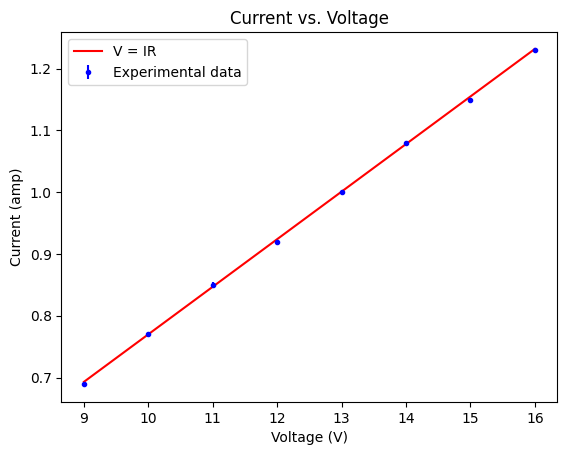

In [7]:
# Scatter Plot

# 1: find the limits of the data:
xmin = np.min(VVec) 
xmax = np.max(VVec)

# 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 100) 

# 3: calculate the model values:
slope = 0.077 # Our initial estimate of the slope
ypoints = xpoints * slope 

# 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "V = IR")

# 5: plot the data:
plt.errorbar(VVec, IVec, uIVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Current vs. Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (amp)")
plt.legend()
plt.show()

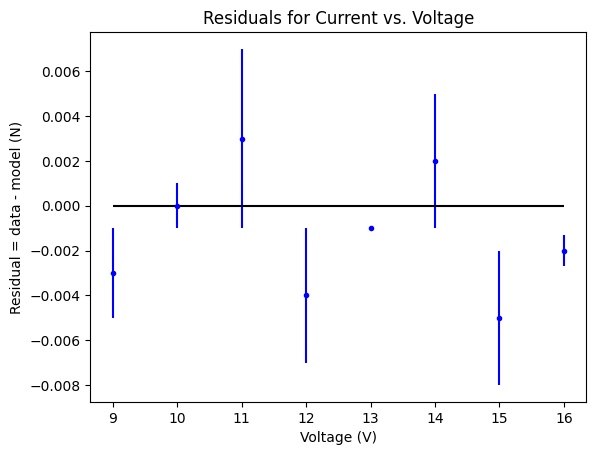

In [8]:
# Residuals plot
# Residuals step 1: Calculate the model at each x-datapoint
ymodel = slope * VVec # y = mx at each x_i

# Residuals step 2: Calcualte the residual vector
RVec = IVec - ymodel

# Resoduals step 3: Plot the residual vector against the x-data vector
plt.errorbar(VVec, RVec, uIVec, fmt="bo", markersize = 3)

# Residuals step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Residuals step 5: Add axis labels and title, and show the graph
plt.title("Residuals for Current vs. Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Residual = data - model (N)")
plt.show()

## Part E - IMPROVE, COMPARE, SUMMARIZE, REFLECT

### Calculations for the Spreadsheet

In [10]:
# slope and u[slope]
slope_max = 0.0771
slope_min = 0.0765
slope_best = 0.077
u_slope = (slope_max-slope_min)/2
print("The model slope is with 68% confidence interval: {:.4f}+/-{:.4f} N/m".format(slope_best, u_slope)) 
# u[slope]/slope
uSlopebySlope = u_slope/slope_best
# R and u_R
R = 1/slope
u_R = R* (u_slope/slope)
# u[R]/R
uRbyR = u_R/R 
R

The model slope is with 68% confidence interval: 0.0770+/-0.0003 N/m


12.987012987012987

#### Does the Ohm’s law model describe your data?
Yes. Ohm's law states that the current through a device is proportional to the voltage applied to it $V = IR$. At the beginning of the lab, we set the resistance to be 13 Ω. The result I got from my data collection and calculations is R = 12.99 Ω. Since the value for my resistance is very close to the actual predetermined resistance. I can conclude that the Ohm's law model describes my data.?)

#### Does the resistance you found match the expected resistance (13.00 Ω)?
Yes, the resistance I found from my data is 12.99 Ω and the expected resistance is 13.00 Ω.

#### Compare with at least one other student. Does your resistance match their resistance (how do we make quantitative comparisons between two values in this course?)
Comparing my results to Niloy, we can see that our value for slope is the same (0.077), and the value we got for R is also very similar. I got 12.99 Ω, whereas he got 13.00 Ω. We can also conclude that Niloy has a more accurate result because his u[slope] and u[R] values are lower than mine. Whereas he got 0.0001 and 0.017 for u[slope] and u[R], respectively, I got 0.0003 and 0.0505.

## Part F - IMPROVE, COMPARE, SUMMARIZE, REFLECT

#### Improvements
- I could increase the interval of my voltage measurements so that I have a much bigger range of values instead of 9 to 16 volts, I could try to do 10 to 45 volts with 5-volt increases starting from 10 volts.
- I could also increase my number of measurements so that I have more data that could help calculate a more informed result. 

Had left over time so decided to do a second round of measurements with both brainstormed improvements.

In [4]:
data_entry2.sheet_copy("lab05_lab_ohms_law", "lab05_lab2_ohms_law")

Sheet name: lab05_lab2_ohms_law.csv


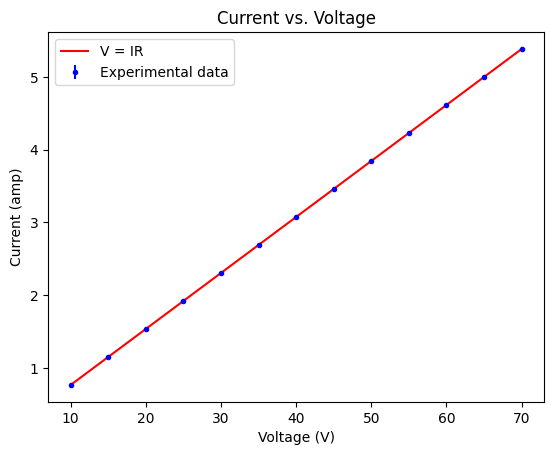

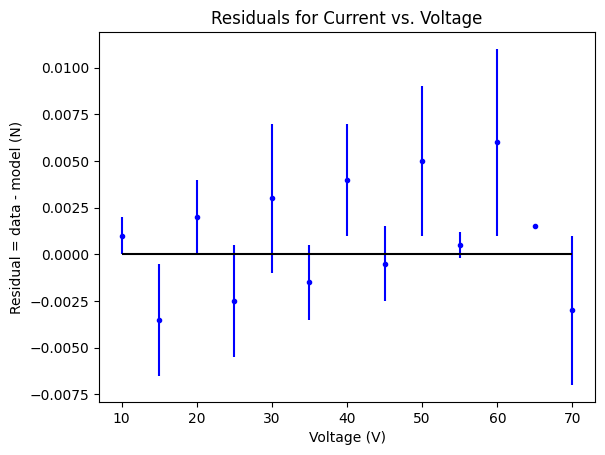

In [130]:
# Scatter Plot

# 1: find the limits of the data:
xmin = np.min(VVec) 
xmax = np.max(VVec)

# 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 100) 

# 3: calculate the model values:
slope = 0.0769 # Our initial estimate of the slope
ypoints = xpoints * slope 

# 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "V = IR")

# 5: plot the data:
plt.errorbar(VVec, IVec, uIVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Current vs. Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (amp)")
plt.legend()
plt.show()

# Residuals plot
# Residuals step 1: Calculate the model at each x-datapoint
ymodel = slope * VVec # y = mx at each x_i

# Residuals step 2: Calcualte the residual vector
RVec = IVec - ymodel

# Resoduals step 3: Plot the residual vector against the x-data vector
plt.errorbar(VVec, RVec, uIVec, fmt="bo", markersize = 3)

# Residuals step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Residuals step 5: Add axis labels and title, and show the graph
plt.title("Residuals for Current vs. Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Residual = data - model (N)")
plt.show()

In [133]:
# slope and u[slope]
slope_max = 0.077
slope_min = 0.07689
slope_best = 0.0769
u_slope = (slope_max-slope_min)/2
print("The model slope is with 68% confidence interval: {:.4f}+/-{:.4f} N/m".format(slope_best, u_slope)) 
# u[slope]/slope
uSlopebySlope = u_slope/slope_best
# R and u_R
R = 1/slope
u_R = R* (u_slope/slope)
# u[R]/R
uRbyR = u_R/R 

The model slope is with 68% confidence interval: 0.0769+/-0.0001 N/m


## Part G - Summary

### Summary of how your key results and the results of your analysis and comparisons evolved throughout the lab.From the first and second rounds of results, I can conclude that I am extremely confident that the experiment goal obeys Ohm's law. Using the collected results in round one of data collection I concluded that the resistance 12.99 Ω with an uncertainty of 0.0505 Ω. I also found the slope to be 0.07700 +/- 0.0003 N/m. Using improvement methods for data collection, from my second round of results I concluded that the resistance 13.00 Ω with an uncertainty of 5.499e-05 Ω. I also found the slope to be 0.07690 +/- 0.0001 N/m. do next?


- Slope value with uncertainty round one: 0.07700 +/- 0.0003 N/m with 68% confidence interval
- Slope value with uncertainty round two: 0.07690 +/- 0.0001 N/m with 68% confidence interval
- Resistance value of First Round: 12.99 Ω
- Resistance value of Second round: 13.00 Ω

### Describe and justify your major improvements and how they proved to be successful or unsuccessful (if performed). It may be helpful to use relative uncertainty to quantify your argument.
I increased my number of measurements and my range of measurements which proved to be successful. My first round of measurements was 7 measurements ranging from 9 to 16 volts with 1 volt increase between each value. My second round of data was 12 measurements ranging from 10 to 70 volts with 5 volt increase between each value. My final result in my first round was the model slope being 0.0770 +/- 0.000300 N/m with 68% confidence interval. My second round results were the model slope being 0.0769 +/- 0.000100 N/m with 68% confidence interval. It can be observed that the second round results are more accurate since they have a low uncertainty compared to my first round ($0.000100 < 0.000300$). 

### Addressing the experimental goal and describing the conclusions you can make from the results of your comparisons.
Ohm's Law states that the current through a device is proportional to the voltage applied to it $V = IR$. The experimental goal of this lab was to determine the resistance of a resistor, and whether it obeys Ohm’s law. Using the collected data and the results stated above, I determined the resistance of the resistor which was 13.00Ω (the same value as the expected resistance of 13Ω). Therefore, i can conclude that the experiment goal obeys Ohm's law. 

### Thoughts for further investigation. If you were to spend more time with this experiment, what would you plan to do next?
I would try to collect more data with small value increases. In my second round of data, I measured from 10 volts to 70 volts with 5-volt increases. I f I were to spend more time with this experiment, I would decrease my voltage measurement range and decrease my voltage increase (eg. 10 to 40, with 2 volt increases)

# Submit

Steps for submission:

1. Click: Run => Run_All_Cells
2. Read through the notebook to ensure all the cells executed correctly and without error.
3. File => Save_and_Export_Notebook_As->HTML
4. Upload the HTML document to the lab submission assignment on Canvas.

In [132]:
display_sheets()

Sheet: de2   File: lab05_lab_ohms_law.csv


,V,u[v],I,u[I]
Units,V,V,A,A
0,9,0.03,0.690,0.002
1,10,0.01,0.770,0.001
2,11,0.05,0.850,0.004
3,12,0.04,0.920,0.003
4,13,0,1,0
5,14,0.04,1.080,0.003
6,15,0.05,1.150,0.003
7,16,0.01,1.230,0.0007


Sheet: __   File: lab05_lab2_ohms_law.csv


,V,u[v],I,u[I]
Units,V,V,A,A
0,10,0.01,0.770,0.001
1,15,0.05,1.15,0.003
2,20,0.02,1.54,0.002
3,25,0.04,1.92,0.003
4,30,0.03,2.31,0.004
5,35,0.03,2.69,0.002
6,40,0.04,3.08,0.003
7,45,0.02,3.46,0.002
8,50,0.05,3.85,0.004


Sheet: _129   File: lab05_lab2_ohms_law.csv


,V,u[v],I,u[I]
Units,V,V,A,A
0,10,0.01,0.770,0.001
1,15,0.05,1.15,0.003
2,20,0.02,1.54,0.002
3,25,0.04,1.92,0.003
4,30,0.03,2.31,0.004
5,35,0.03,2.69,0.002
6,40,0.04,3.08,0.003
7,45,0.02,3.46,0.002
8,50,0.05,3.85,0.004
